# Bayesian Estimation
In this notebook, we will explore the basics of Bayesian estimation. We will start with a simple example of estimating the bias of a coin. Then, we will move to a more complex example of estimating the position of a robot using a Kalman filter.

## Probability

### Probability distribution
A probability distribution is a function that describes the likelihood of obtaining the possible values that a random variable can assume. The probability distribution of a random variable $X$ is often denoted by $P(X)$ or $f_X(x)$.

### Probability density function
A probability density function (PDF) is a function that describes the relative likelihood for a random variable $X$ to take on a given value $x$. The probability for the random variable to fall within a particular region is given by the integral of this variable’s density over the region. The probability density function is nonnegative everywhere, and its integral over the entire space is equal to one.

Example:
Let $X$ be a random variable that represents the outcome of a coin toss. The probability density function of $X$ is given by:

$$f_X(x) = \begin{cases} 0.5 & \text{if } x = 0 \\ 0.5 & \text{if } x = 1 \end{cases}$$

### Cumulative distribution function
The cumulative distribution function (CDF) of a real-valued random variable $X$, or just distribution function of $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. In the case of a continuous distribution, it gives the area under the probability density function from minus infinity to $x$. The probability that $X$ lies in the semi-closed interval $(a, b]$ is therefore equal to $F(b) − F(a)$.

Example:
Let $X$ be a random variable that represents the outcome of a dice roll. The cumulative distribution function of $X$ is given by:

$$F_X(x) = \begin{cases} 0 & \text{if } x < 1 \\ \frac{1}{6} & \text{if } 1 \leq x < 2 \\ \frac{2}{6} & \text{if } 2 \leq x < 3 \\ \frac{3}{6} & \text{if } 3 \leq x < 4 \\ \frac{4}{6} & \text{if } 4 \leq x < 5 \\ \frac{5}{6} & \text{if } 5 \leq x < 6 \\ 1 & \text{if } x \geq 6 \end{cases}$$

### Bayes' rule
Bayes' rule is a formula that describes how to update the probabilities of hypotheses when given evidence. It follows simply from the axioms of conditional probability, but can be used to powerfully reason about a wide range of problems involving belief updates.

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

where $P(A|B)$ is a conditional probability: the likelihood of event $A$ occurring given that $B$ is true.

Example:
Let $A$ be the event that a randomly chosen person has a disease, and $B$ be the event that a randomly chosen person tests positive for the disease. Then $P(A|B)$ is the probability that the person has the disease given that they tested positive. $P(B|A)$ is the probability that the person tests positive given that they have the disease. $P(A)$ is the probability that a person has the disease, regardless of the test. $P(B)$ is the probability that a person tests positive, regardless of the disease.

### Gaussian distribution
The Gaussian distribution is a continuous function which approximates the exact binomial distribution of events. It is used to represent the distribution of random variables whose logarithm follows a normal distribution. The normal distribution is a commonly encountered continuous probability distribution.

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.

### Maximum a posteriori (MAP)
The maximum a posteriori (MAP) estimate of a probability distribution is the mode of the posterior distribution. The MAP can be used to obtain a point estimate of an unobserved quantity on the basis of empirical data. It is closely related to the method of maximum likelihood (ML) estimation, but employs an augmented optimization objective which incorporates a prior distribution (that is, the MAP estimate).

### Maximum likelihood estimation (MLE)
Maximum likelihood estimation (MLE) is a method of estimating the parameters of a probability distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate.

### Minimum mean squared error (MMSE)
The minimum mean squared error (MMSE) estimator is a method of estimating an unknown probability density function (pdf) using a specific estimation criterion: minimize the mean square error (MSE), or equivalently the expected value of the squared estimation error. The MMSE estimator is the posterior mean of the random variable given the observed samples.


## Kalman filter
The Kalman filter is an algorithm that uses a series of measurements observed over time, containing statistical noise and other inaccuracies, and produces estimates of unknown variables that tend to be more precise than those based on a single measurement alone. More formally, the Kalman filter operates recursively on streams of noisy input data to produce a statistically optimal estimate of the underlying system state.

### Extended Kalman filter
The extended Kalman filter (EKF) is the nonlinear version of the Kalman filter which linearizes about an estimate of the current mean and covariance. In the case of well defined transition models, the EKF has been considered the de facto standard in the theory of nonlinear state estimation, navigation systems and GPS.

### Unscented Kalman filter
The unscented Kalman filter (UKF) is a solution to non-linear filtering. It uses a deterministic sampling technique known as the unscented transformation (UT) to pick a minimal set of sample points (called sigma points) around the mean. These sigma points are then propagated through the non-linear functions, and the statistics of the resulting points are used to approximate the mean and covariance of the posterior distribution.

## Example: Estimating the bias of a coin
In this example, we will estimate the bias of a coin using Bayesian estimation. We will start with a uniform prior and then update the prior using the Bayes' rule.

### Prior
The prior is the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account. In our case, we will assume that we have no prior knowledge about the bias of the coin, so we will use a uniform distribution.

### Likelihood
The likelihood is the probability of the evidence given the prior. In our case, the evidence is the result of flipping the coin. We will assume that the coin is fair, so the likelihood will be a binomial distribution with $p=0.5$.

### Posterior
The posterior is the probability distribution that would express one's beliefs about this quantity after some evidence is taken into account. In our case, we will update the prior using the Bayes' rule.

### Implementation
We will implement the Bayesian estimation using Python. We will start by importing the required libraries.


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom



Then, we will define the prior, likelihood, and posterior functions.


In [5]:

def prior(bias):
    return 1

def likelihood(bias, flips, heads):
    return binom.pmf(heads, flips, bias)

def posterior(bias, flips, heads):
    return prior(bias) * likelihood(bias, flips, heads)



Finally, we will plot the prior, likelihood, and posterior.


[0.0, 2.5187146792065994e-08, 7.656975270299766e-07, 5.520914654323233e-06, 2.2078348175803453e-05, 6.390544810768989e-05, 0.0001507369034735991, 0.0003086582798978263, 0.0005697777571797082, 0.0009715690893624195, 0.0015559607161987384, 0.002368238196096027, 0.003455819796481548, 0.004866958157955777, 0.0066494144334842764, 0.008849145183106479, 0.011509036568101021, 0.014667715026130646, 0.018358458610483686, 0.022608228532022743, 0.027436836141731848, 0.032856256624711505, 0.03887009703299409, 0.04547322295452663, 0.052651545088989504, 0.060381964267666774, 0.06863247100425197, 0.07736239348615369, 0.08652278600143455, 0.0960569481348801, 0.10590106364771947, 0.11598494676912474, 0.12623288266365257, 0.1365645480871816, 0.14689599769451278, 0.15714070110452427, 0.1672106156535213, 0.17701727976403345, 0.18647291201473715, 0.1954915013072621, 0.20398987397727436, 0.21188872428033576, 0.2191135953874477, 0.22559579884086414, 0.2312732613375025, 0.236091288715068, 0.2400032381046653, 0

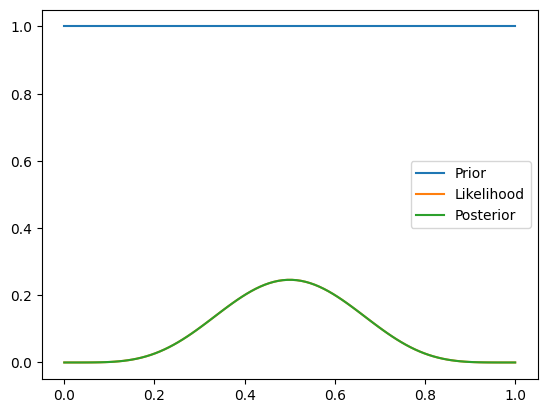

In [7]:

bias = np.linspace(0, 1, 100)
flips = 10
heads = 5

plt.plot(bias, [prior(b) for b in bias], label='Prior')
plt.plot(bias, [likelihood(b, flips, heads) for b in bias], label='Likelihood')
plt.plot(bias, [posterior(b, flips, heads) for b in bias], label='Posterior')
plt.legend()
plt.show()




![png](output_1_0.png)

## Example: Estimating the position of a robot
In this example, we will estimate the position of a robot using a Kalman filter. We will start with a uniform prior and then update the prior using the Bayes' rule.

### Prior
The prior is the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account. In our case, we will assume that we have no prior knowledge about the position of the robot, so we will use a uniform distribution.

### Likelihood
The likelihood is the probability of the evidence given the prior. In our case, the new evidence is the position of the robot. We will assume that the robot moves in a straight line with a constant velocity, so the likelihood will be a Gaussian distribution with $\mu=0$ and $\sigma=1$.

### Posterior
The posterior is the probability distribution that would express one's beliefs about this quantity after some evidence is taken into account. In our case, we will update the prior using the Bayes' rule.

### Implementation
We will implement the Bayesian estimation using Python. We will start by importing the required libraries.


In [8]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



Then, we will define the prior, likelihood, and posterior functions.


In [12]:

def prior(position):
    return 1

def likelihood(position, velocity, measurement):
    return norm.pdf(measurement, position + velocity, 1)

def posterior(position, velocity, measurement):
    return prior(position) * likelihood(position, velocity, measurement)



Finally, we will plot the prior, likelihood, and posterior.


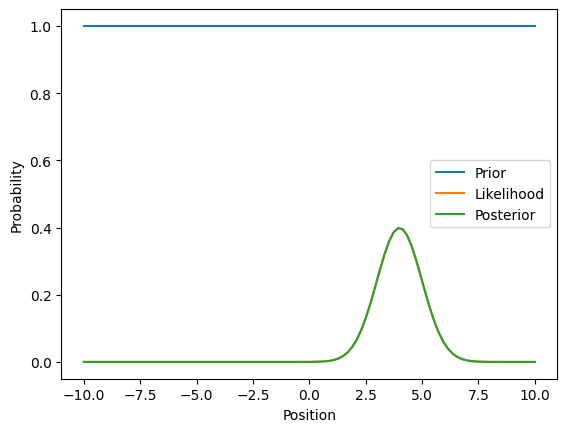

In [14]:

position = np.linspace(-10, 10, 100)
velocity = 1
measurement = 5

plt.plot(position, [prior(p) for p in position], label='Prior')
plt.plot(position, [likelihood(p, velocity, measurement) for p in position], label='Likelihood')
plt.plot(position, [posterior(p, velocity, measurement) for p in position], label='Posterior')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()
